# Data Visualization using Seaborn

Data Exploration is an integral part of constructing machine learning models, and majorly when it comes to python it boils down to three general visualization libraries: Seaborn, Matplotlib and Plotly. A basic challenge faced by all beginners is understanding which type of visualization is to be used when and how! This work is constructed to clear those doubts and provide a breadh first traversal to visualizing statistical relationships present in data with a hands-on approach and reasoning perspective


In [3]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


lmplot() is used to perform regression on datasets with conditional subsets and makes use of regplot() and FacetGrid(). The FacetGrid class helps in visualizing the distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels making lmplot() more computationally intensive.

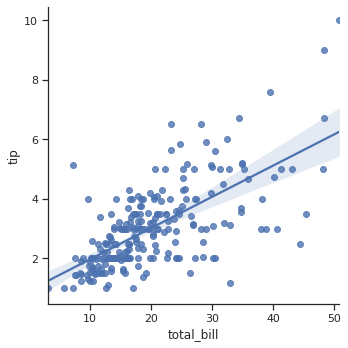

In [4]:
# lmplot refers to fitting a regression line on data using facet grids
sns.set(style="ticks")
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips)

In [5]:
# Factor Plots can be used for time series data
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Factor Plots are used for drawing categorical plots on FacetGrid. They are used for comparing multiple groups present in the data together. 

- The default plot that is shown is a point plot, but other seaborn categorical plots can be chosen with the kind parameter, including box plots, violin plots, bar plots, or strip plots.
- For comparisons closer to each other, use hue variable, and for horizontal or vertical secondary comparisons use row and col.
- 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


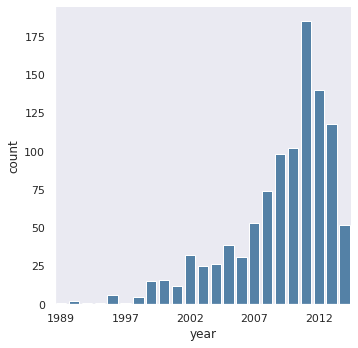

In [6]:
with sns.axes_style('dark'):
  g = sns.factorplot("year", data=planets, color="steelblue", kind="count")
  g.set_xticklabels(step=5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


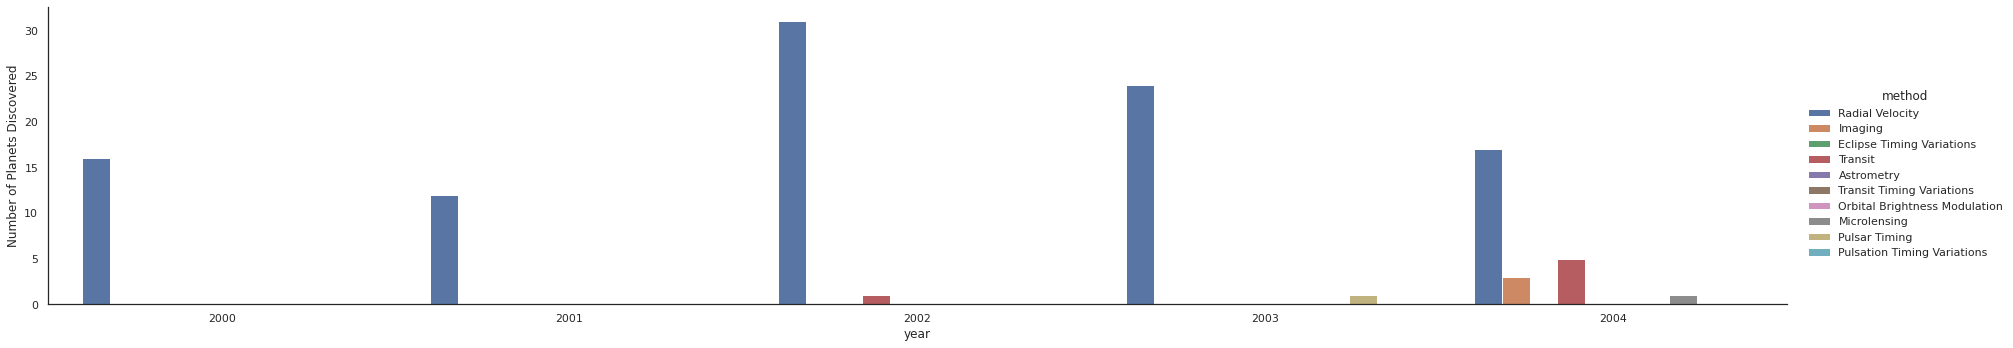

In [7]:
with sns.axes_style('white'):
  g = sns.factorplot("year", data=planets, aspect=5, kind='count', hue='method',
                     order=range(2000, 2005))
  g.set_ylabels('Number of Planets Discovered')

x = planets["year"]
y = planets["orbital_period"]
sns.barplot(x=x, y=y, palette='vlag')

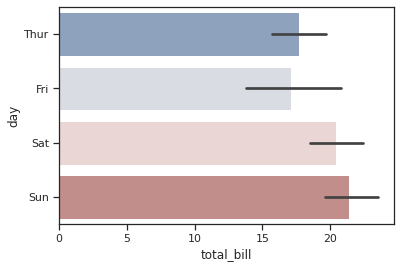

In [8]:
# Let us try a barplot now
tips = sns.load_dataset("tips")
x = tips["total_bill"]
y = tips["day"]
sns.barplot(x, y, palette='vlag')

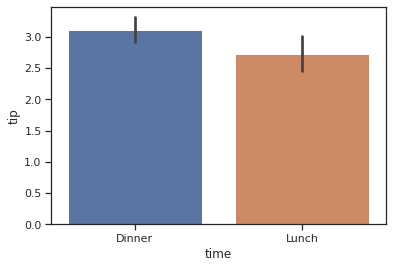

In [9]:
sns.barplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])

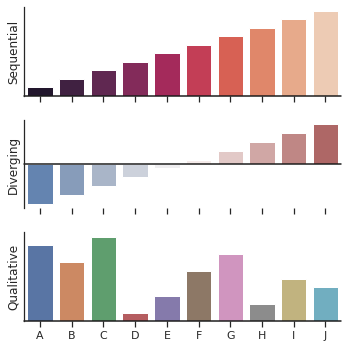

In [10]:
import matplotlib.pyplot as plt
import numpy as np
rs = np.random.RandomState(8)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5,5))
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

# Kernel Distribution Plot (KDEPlot)

KDEPlot is used to represent the probability density estimation of continous or non-parametric values together. 
- We can plot univariate and multivariate analysis and features together using KDEPlot.
- Univariate Plot is created using seaborn.kdeplot() and the area under the curve is used to represent the probability distribution under the curve.
- Bivariate Plot can be created using the same method and it represents the probability distribution of multiple variables and data distribution between two data variables.
- We can also make the plots vertical using the argument vertical=True, by default it is False.
- Multiple color palettes can be used within the kdeplot using cmap argument.
- The two shaded Bivariate Kdeplots help in understanding the variation of the data in terms of the probability distribution of the bivariate group of data variables.
- To know the strength of the variance in data, we can make use of a colorbar and cbar.

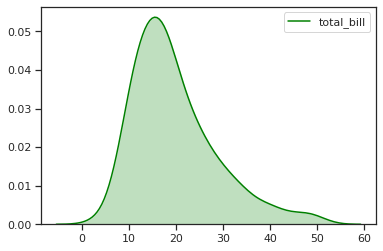

In [11]:
# Univariate Plot
sns.kdeplot(tips["total_bill"], color='green', shade=True)

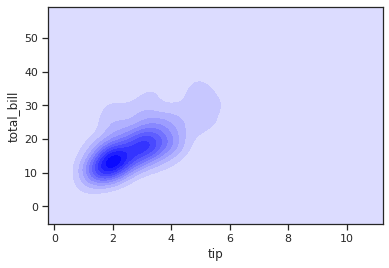

In [12]:
# Bivariate Plot
sns.kdeplot(tips['tip'],tips['total_bill'],color='blue',shade=True)

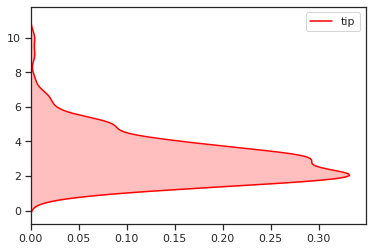

In [13]:
# Vertical Plot
sns.kdeplot(tips['tip'], shade=True, vertical=True, color='red')

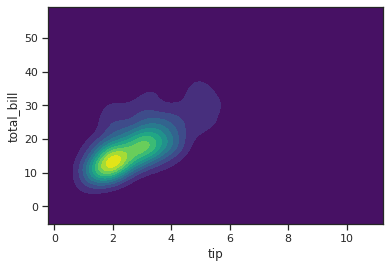

In [14]:
# Changing Color Palette
sns.kdeplot(tips['tip'], tips['total_bill'], shade=True, cmap='viridis')

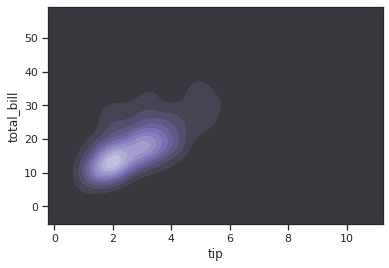

In [15]:
# The variance in the data can be visualised using double shaded color palettes
sns.kdeplot(tips['tip'], tips['total_bill'], cmap='viridis', shade=True)
sns.kdeplot(tips['tip'], tips['total_bill'], cmap='Purples_d', shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'colorbar'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


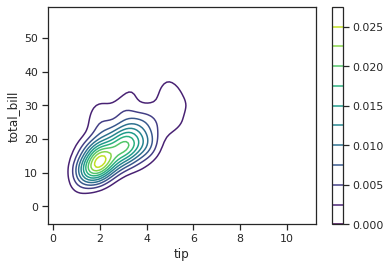

In [16]:
sns.kdeplot(tips["tip"], tips["total_bill"], cmap='viridis', colorbar=True, vertical=True, cbar=True)

# Scatter Plots

- Scatter plot graph is used to study the relationship between two variables. It basically shows how one variable is affected by the other.

- Scatter plots usually consist of a large body of data. The closer the data points come when plotted to making a straight line, the higher the correlation between the two variables, or the stronger the relationship.

- If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation . If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation.

In [17]:
# Scatter Plot
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

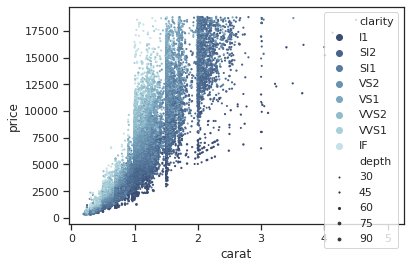

In [20]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds)

# Distribution Plot
A distribution plot explains a range of set of numeric values plotted against a distribution. 
- In a distribution chart, ideally, two dimensions and one measure are used. 
- Used for univariate and bivariate distributions.
- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

## Histograms

- Histograms reveal the shape of the distribution, its central tendency, and the spread of values in your sample data
- It is used with **continous** data to study the distribution and check for outliers.
- These bars takes the count or number of occurences of data points in a given range (called bins) and stacks the data points into a convenient bar within the representation.
- If there are more than a single group of means present in the data, that is, if there is a difference in means then it cannot be seen in a distribution plot, but in a histogram the mean shifts along the X-axis and we can use this to study the centre of data.
- They can be used to study the skewness in the distribution.
  - For a right skewed distribution, the histogram will have majority of data stacked in the left.
  - For a left skewed distribution, the histogram will have majority of data stacked in the right.
- Used to detect outliers in the data easily visbible if there a few missing bins followed by an outlier sudden bin in histogram.
- Used to identify multimodal distributions, which has more than a single peak.
- Useful in finding subpopulations present within the data.
- Used in finding the fit of the probability distribution, determine sample size, compare multiple distributions, and also used for finding correct hypothesis tests which play a crucial role in data understanding and efficient cleaning.

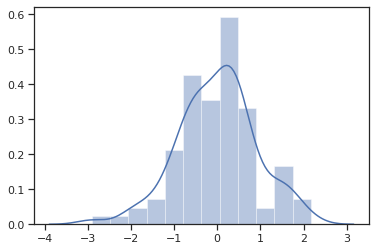

In [21]:
# Univariate Distribution
x = np.random.normal(size=100)
sns.distplot(x)

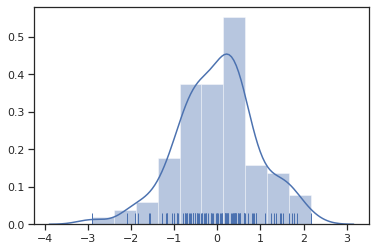

In [22]:
# Histogram
sns.distplot(x, rug=True, kde=True, bins=10)

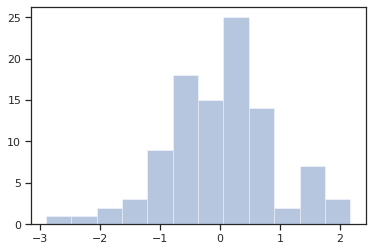

In [23]:
# Plot a simple histogram with binsize determined automatically
sns.distplot(x, kde=False, color="b")

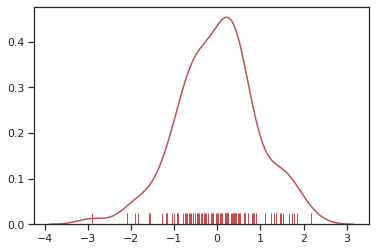

In [24]:
# Plot a kernel density estimate and rug plot
sns.distplot(x, hist=False, rug=True, color="r")

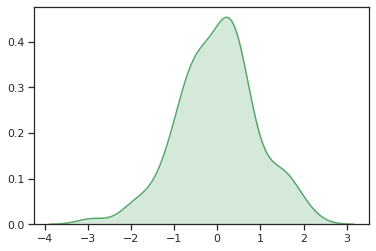

In [25]:
# Plot a filled kernel density estimate
sns.distplot(x, hist=False, color="g", kde_kws={"shade": True})

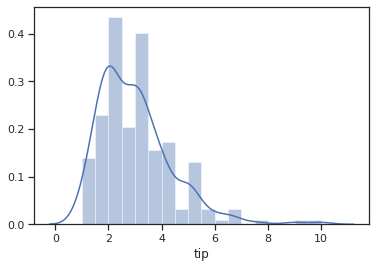

In [26]:
# Right skewed plot
sns.distplot(tips.tip, hist=True, color='b')

# Line Plot

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

A simple way to construct lineplots is:

> To draw a line plot,
A number line to ought,
The different values we sort.
Making data easy to spot!

Credits: SplashLearn Mathematics

- In seaborn lineplot, we can compare continous variables with categorical variables, in a continous data point format.


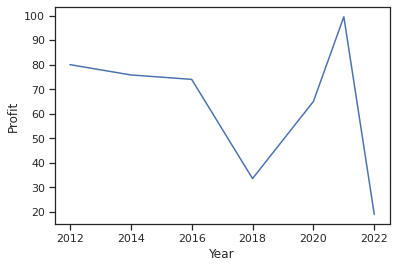

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
Year = [2012, 2014, 2016, 2020, 2021, 2022, 2018]
Profit = [80, 75.8, 74, 65, 99.5, 19, 33.6]
 
data_plot = pd.DataFrame({"Year":Year, "Profit":Profit})
 
sns.lineplot(x = "Year", y = "Profit", data=data_plot)
plt.show()

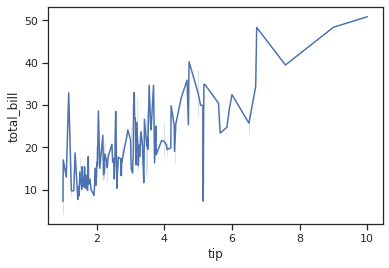

In [28]:
sns.lineplot(x="tip", y="total_bill", data=tips)

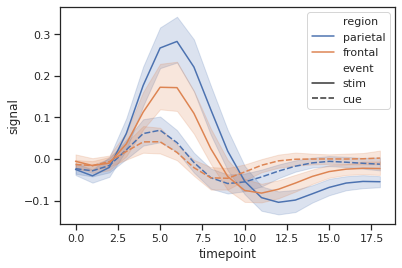

In [29]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

tips.head()

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# FacetGrid

Faceting is the concept of simplifying data variables across multiple subplots, and combining those subplots into a single representation.

It is useful in having multiple visualisations in one convenient plotting.



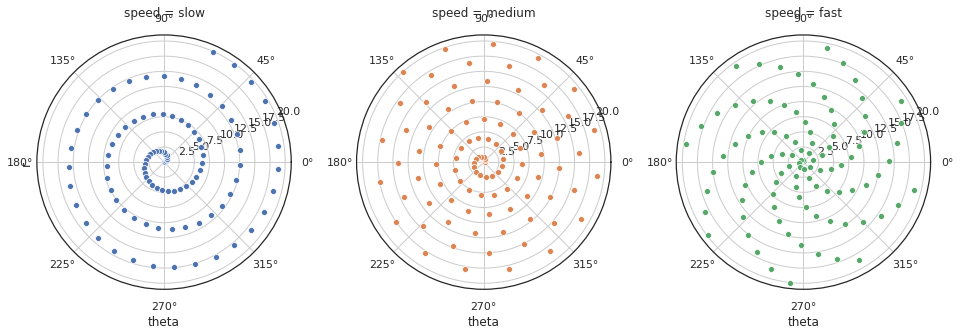

In [31]:
# Trying out a radial dataset from documentation

r = np.linspace(0, 20, num=100)

df = pd.DataFrame({'r':r, 'slow':r, 'medium':2*r, 'fast':4*r})

df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

g = sns.FacetGrid(df, col='speed', hue='speed',
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

g.map(sns.scatterplot, "theta", "r")

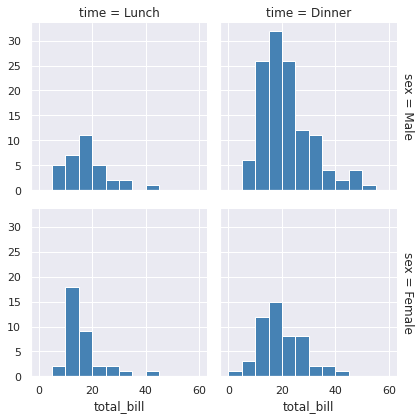

In [32]:
# Subsets of Data using FacetGrids

sns.set(style="darkgrid")

g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

# Catplot

It is used to compare numerical and categorical variables conveniently in seaborn. It can handle eight different types of plots:

- Categorical Scatterplots
  - stripplot()
  - swarmplot()
- Categorical Distribution Plots
  - boxplot()
  - violinplot()
  - boxenplot()
- Categorical Estimate Plots
  - pointplot()
  - barplot()
  - countplot()
By default, catplot creates stripplot with jitter as the width of the plot

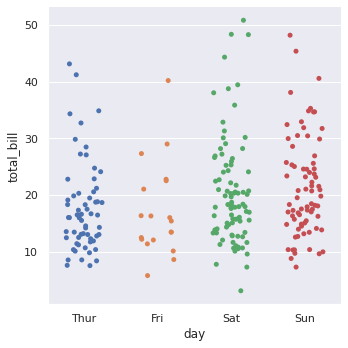

In [33]:
# Stripplot can be used to study two numerical variables and their relationship
sns.catplot(x='day', y='total_bill', data=tips, jitter='0.25')

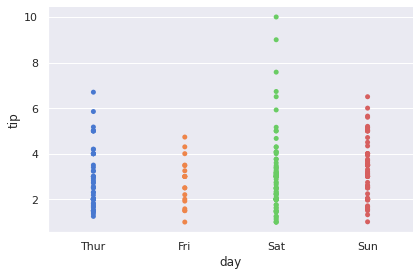

In [34]:
# We can also make simple stripplots without using jitter
sns.catplot(x='day', y='tip', data=tips, palette='muted',
            jitter=False, height=4, aspect=1.5)

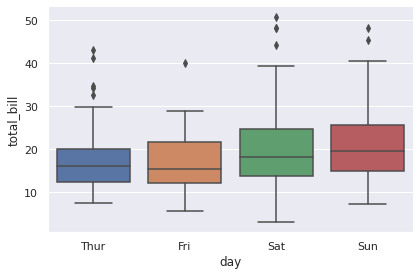

In [35]:
# Boxplot with catplot
sns.catplot(x='day', y='total_bill', data=tips,
            kind='box',height=4, aspect=1.5)

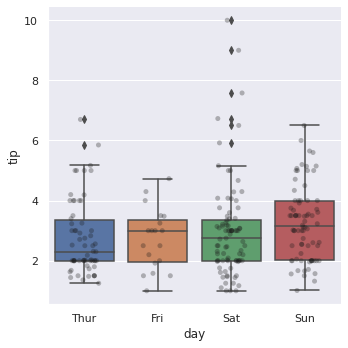

In [36]:
# We can also show datapoints on top of the boxplot in order to get a better idea
sns.catplot(x='day', y='tip', data=tips, kind='box')
# Add data points to the boxplot with stripplot
sns.stripplot(x='day', y='tip', data=tips, alpha=0.3, jitter=0.2, color='k')

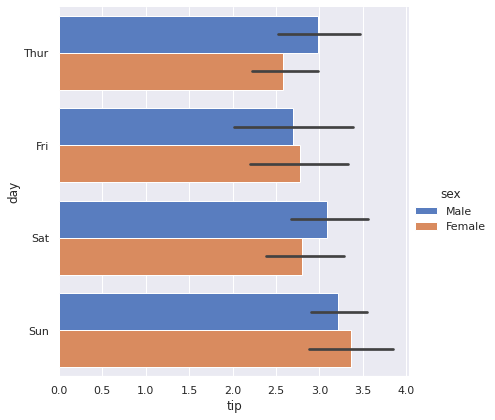

In [37]:
g = sns.catplot(x="tip", y="day", hue="sex", data=tips,
                height=6, kind='bar', palette='muted')
g.despine(left=True)
g.set_ylabels('day')

Regular Boxplots can convey information roughly about central 50% and has limitations with respect to the small sized datasets. 

- In case the dataset is small, the detailed estimates of the tail behaviour beyond the quartiles may not be trustworthy, so the information provided by the boxplots becomes vague to interpret.
- In case of large datasets, the box plots may show huge number of false outliers that can actually be relevant information and if dropped can cause harm to the analysis.

Hence, we make use of boxen catplots which give a reliable estimate of the corresponding quartiles and the outliers are labelled as observations beyond a threshold ($\alpha$) value

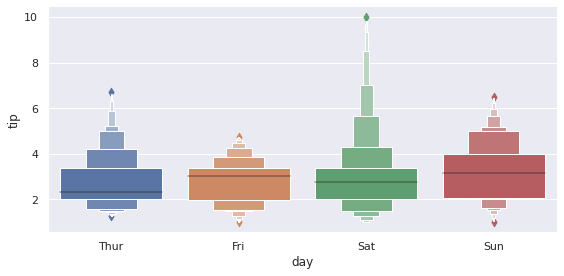

In [38]:
sns.catplot(x='day', y='tip', data=tips, height=4, aspect=2, kind='boxen')

Violin Plots are similar to boxplots, and shows the density of data at different values nicely in addition to the range of data like boxplot.

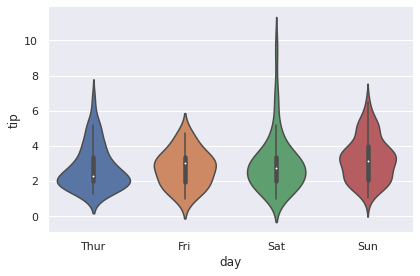

In [39]:
sns.catplot(x='day', y='tip', kind='violin', data=tips, height=4, aspect=1.5)

Point plot using catplot can be made for visualising summary and uncertainty of the data quickly. A point plot shows the mean estimate and uncertainty of the estimate with a point and error bar for each categorical variable.

In [40]:
df = tips[tips['day'].isin(['Sun', 'Sat', 'Fri'])]

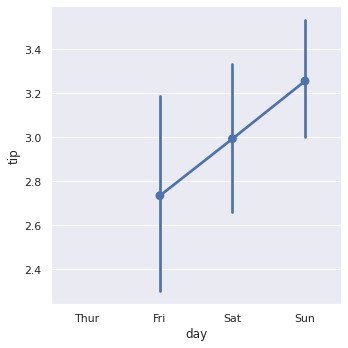

In [41]:
sns.catplot(x='day', y='tip', kind='point', data=df)

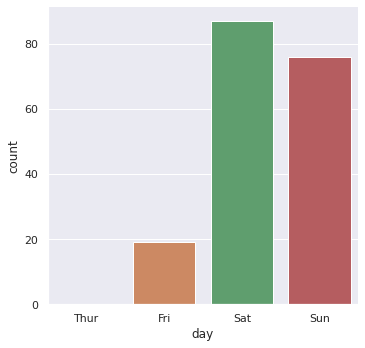

In [42]:
sns.catplot(x='day', kind='count', data=df)

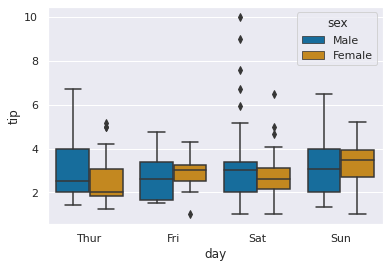

In [43]:
# Let us make grouped plots now
sns.boxplot(y='tip', x='day', data=tips, palette='colorblind', hue='sex')

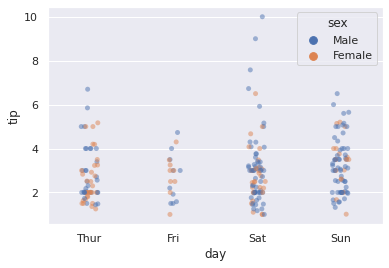

In [44]:
sns.stripplot(y='tip', x='day', data=tips, jitter=True, marker='o', alpha=0.5, hue='sex')

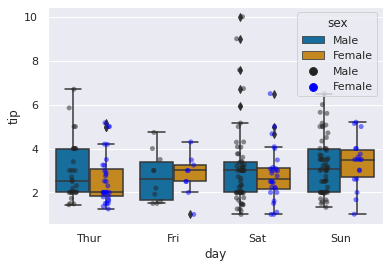

In [45]:
# Lets combine them
sns.boxplot(y='tip', x='day', hue='sex', palette='colorblind', data=tips)
sns.stripplot(y='tip', x='day', hue='sex', alpha=0.5, jitter=True, dodge=True, color='blue', data=tips)

# Heatmap

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. It is used to represent correlations, and multiple representations of values as well in annotated or non-annotated forms.

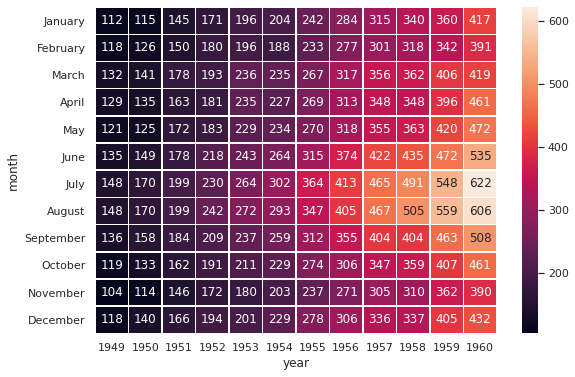

In [52]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

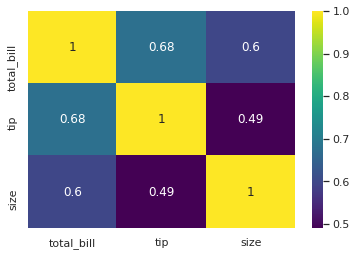

In [51]:
correlation = tips.corr()
sns.heatmap(correlation, cmap='viridis', annot=True)

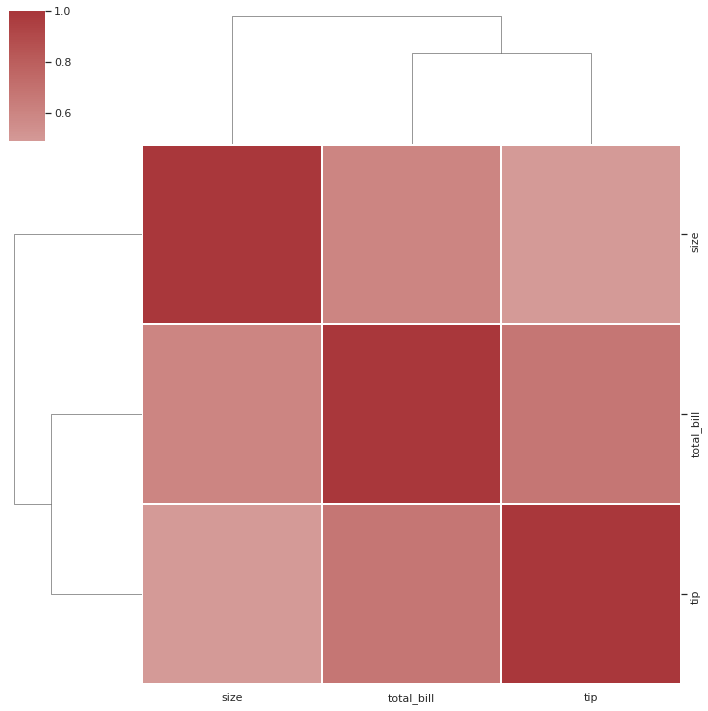

In [69]:
# To study the structure of heatmaps we use clustermaps
sns.clustermap(correlation, center=0, cmap='vlag', linewidths=0.75, figsize=(10,10))

# Jointplot

It displays a relationship between two variables (multivariate) and single profiles (univariate) in the margins.

The multivariate normal distribution is a wonderful tool to demonstrate this type of plot as it is sampling from a multidimensional Gaussian Distribution.

- Jointploy wraps JointGrid with the following options for:
- scatter
- regression
- residual plot
- kdeplot
- hexagonal binnings

In [53]:
x, y = np.random.RandomState(8).multivariate_normal([0, 0], [(1, 0), (0, 1)], 1000).T
df = pd.DataFrame({"x":x, "y":y})

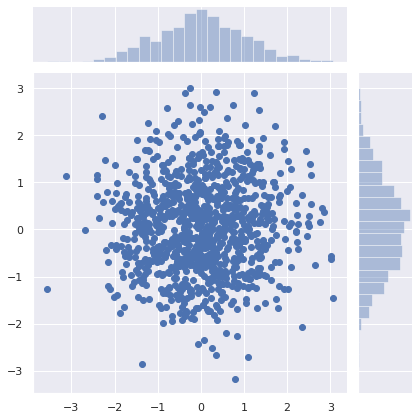

In [54]:
sns.jointplot(data=df, x=x, y=y)

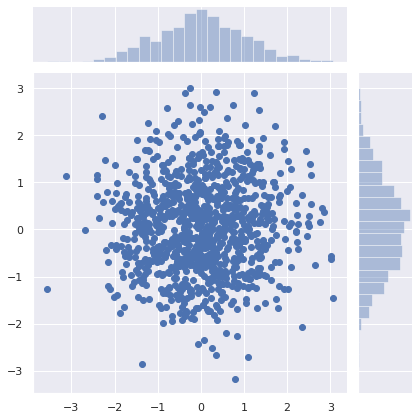

In [55]:
# default parameter is scatterplot
sns.jointplot(x=x, y=y, data=df, kind='scatter')

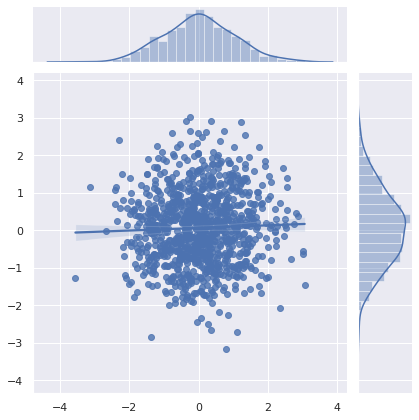

In [56]:
sns.jointplot(x=x, y=y, kind='reg')

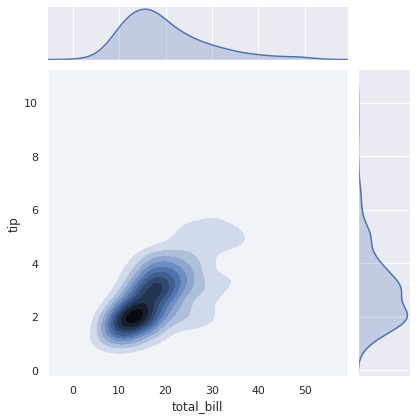

In [59]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='kde')

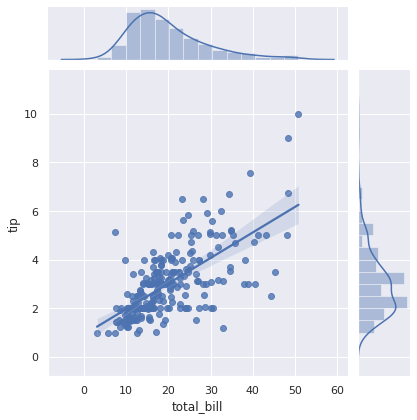

In [60]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

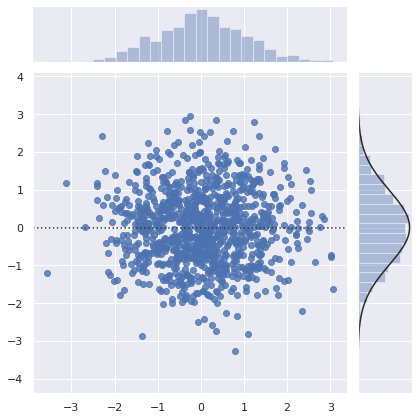

In [62]:
sns.jointplot(x=x, y=y, data=df, kind='resid')

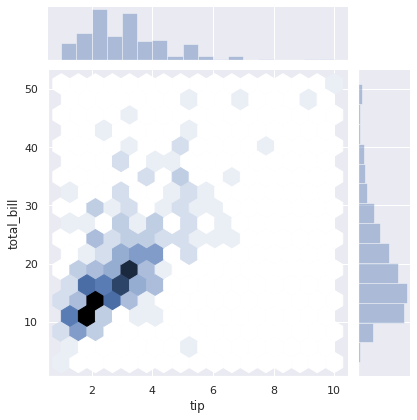

In [63]:
sns.jointplot(data=tips, x="tip", y="total_bill", kind="hex")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


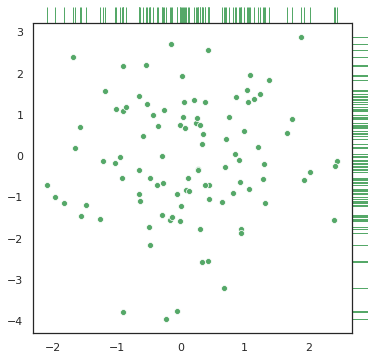

In [65]:
# Similarly, we can try a joint distribution grid
sns.set(style="white", color_codes=True)

# Generate a random bivariate dataset
rs = np.random.RandomState(9)
mean = [0, 0]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T

# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y, space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

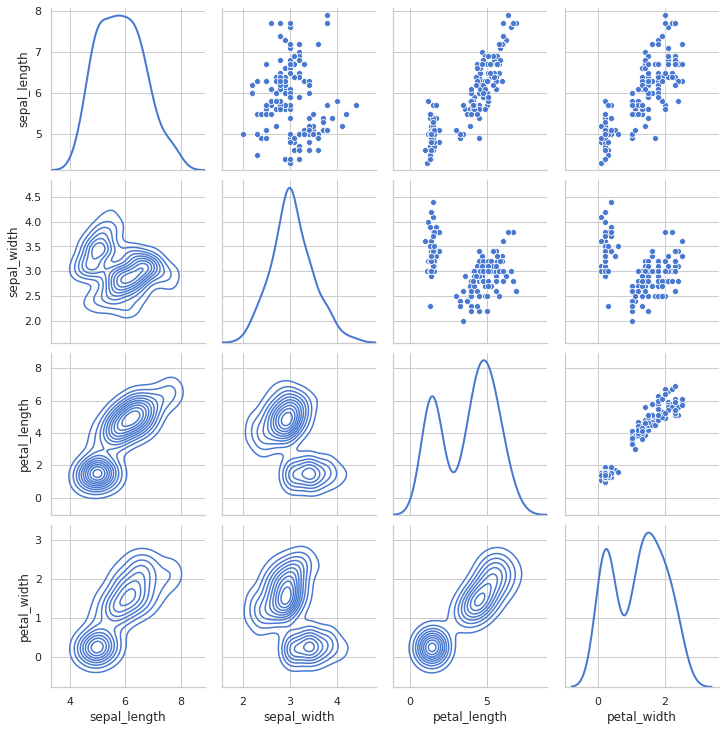

In [68]:
# We can compare each variable with each other too using Pairwise grid
df = sns.load_dataset("iris")
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot, lw=2)

# Swarmplot

This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.

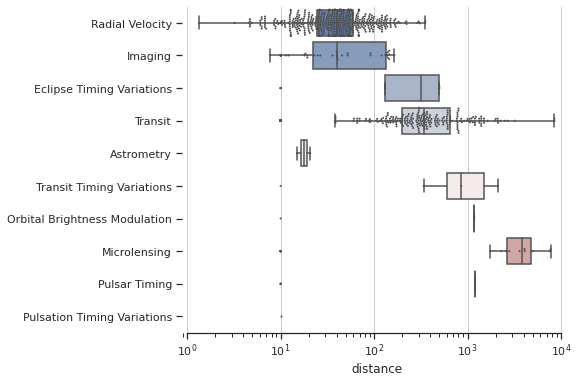

In [64]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

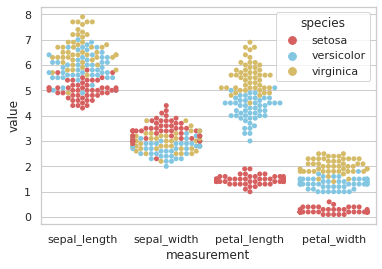

In [66]:
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)


# Summary

We visualized all possible exploration techniques in seaborn as a breadth first revision and learned the uses of various plots and the nature of data they are suitable to deal with.